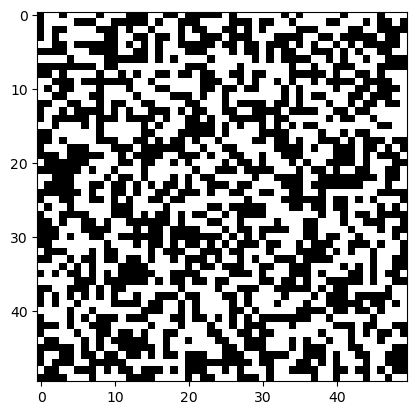

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def update_board(board):
    """Updates the board to the next generation."""
    new_board = np.zeros(board.shape, dtype=int)
    for i in range(board.shape[0]):
        for j in range(board.shape[1]):
            # Count the number of alive neighbors
            num_alive_neighbors = np.sum(board[i-1:i+2, j-1:j+2]) - board[i, j]
            # Apply the rules of the Game of Life
            if board[i, j] == 1 and (num_alive_neighbors == 2 or num_alive_neighbors == 3):
                new_board[i, j] = 1
            elif board[i, j] == 0 and num_alive_neighbors == 3:
                new_board[i, j] = 1
    return new_board

def animate(i, img, board):
    """Updates the animation frame."""
    new_board = update_board(board)
    img.set_data(new_board)  # Use set_data here as img is an AxesImage object
    board[:] = new_board[:]
    return img,

def main():
    # Board size
    rows, cols = 50, 50
    # Create a random initial board
    board = np.random.choice([0, 1], size=(rows, cols))
    
    # Set up the plot
    fig, ax = plt.subplots()
    img = ax.imshow(board, cmap='binary', interpolation='nearest')  # Ensure img is an AxesImage object

    ani = animation.FuncAnimation(fig, animate, fargs=(img, board), frames=100, interval=100)

    plt.show()

if __name__ == "__main__":
    main()
